In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
import pandas as pd

In [4]:
single_test = pd.read_csv('log/single_gpu_test.log')
single_test = single_test.set_index('Time elapsed')
single_test = single_test['Accuracy']
single_test.name = u'テスト (Single GPU)'
single_test.head()

Time elapsed
17.087084    0.340
17.097897    0.350
17.108511    0.360
17.119201    0.355
17.129761    0.356
Name: テスト (Single GPU), dtype: float64

In [5]:
single_train = pd.read_csv('log/single_gpu_train.log')
single_train = single_train.set_index('Time elapsed')
single_train = single_train['Accuracy']
single_train.name = u'訓練 (Single GPU)'
single_train.head()

Time elapsed
0.874748    0.160000
0.908659    0.130000
0.941931    0.116667
0.975167    0.117500
1.008185    0.116000
Name: 訓練 (Single GPU), dtype: float64

In [6]:
multi_test = pd.read_csv('log/multi_gpu_test.log')
multi_test = multi_test.set_index('Time elapsed')
multi_test = multi_test['Accuracy']
multi_test.name = u'テスト (Multi GPU)'
multi_test.head()

Time elapsed
13.187191    0.5000
13.197921    0.4800
13.208476    0.4700
13.219208    0.4725
13.229777    0.4720
Name: テスト (Multi GPU), dtype: float64

In [7]:
multi_train = pd.read_csv('log/multi_gpu_train.log')
multi_train = multi_train.set_index('Time elapsed')
multi_train = multi_train['Accuracy']
multi_train.name = u'訓練 (Multi GPU)'
multi_train.head()

Time elapsed
0.415524    0.500000
0.515784    0.500000
0.616322    0.513333
0.716159    0.500000
0.819319    0.486000
Name: 訓練 (Multi GPU), dtype: float64

In [13]:
def finalize_ax(ax):
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc=4)
    
    ax.set_xlabel('')
    return ax

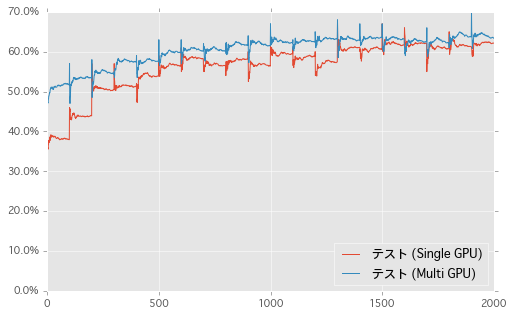

In [14]:
figsize = (8, 5)
# Epoch ごとの比較
fig, ax = plt.subplots(1, 1, figsize=figsize)
single_test.reset_index(drop=True).plot(ax=ax, legend=True)
multi_test.reset_index(drop=True).plot(ax=ax, legend=True)
ax.set_ylim(0, 0.7)
finalize_ax(ax);

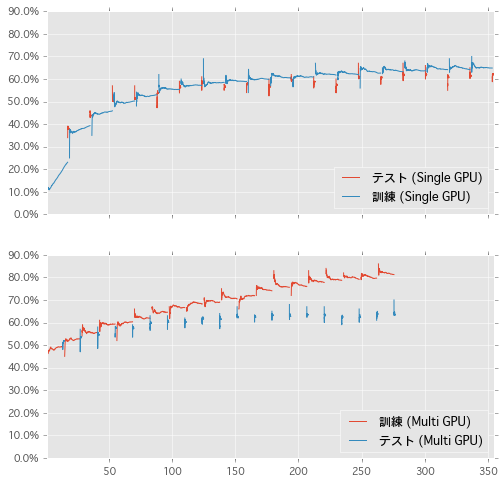

In [17]:
figsize = (8, 8)
fig, axes = plt.subplots(2, 1, figsize=figsize, sharex=True, sharey=True)
multi = pd.concat([multi_test, multi_train], axis=1)
multi.plot(ax=axes[1])
single = pd.concat([single_test, single_train], axis=1)
single.plot(ax=axes[0])
axes[0].set_ylim(0, 0.9)
[finalize_ax(ax) for ax in axes];